# CNN model

----------------------------------------------------------
----------------------------------------------------------
Load train data......

Load test data......
----------------------------------------------------------
Load CNN model......
Compilong the model......

Training the model with same data 10 times......
Epoch 1/10
1740/1740 ━━━━━━━━━━━━━━━━━━━━ 1s 259us/step - accuracy: 0.5318 - loss: 15.2208
Epoch 2/10
1740/1740 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step - accuracy: 0.5415 - loss: 8.0969
Epoch 3/10
1740/1740 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - accuracy: 0.5385 - loss: 8.1767
Epoch 4/10
1740/1740 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step - accuracy: 0.5466 - loss: 6.0327
Epoch 5/10
1740/1740 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step - accuracy: 0.5463 - loss: 4.4553
Epoch 6/10
1740/1740 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - accuracy: 0.5398 - loss: 10.2686
Epoch 7/10
1740/1740 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step - accuracy: 0.5509 - loss: 8.7859
Epoch 8/10
1740/1740 ━━━━━━━━━━━━━━━━━━━━ 0s 247us

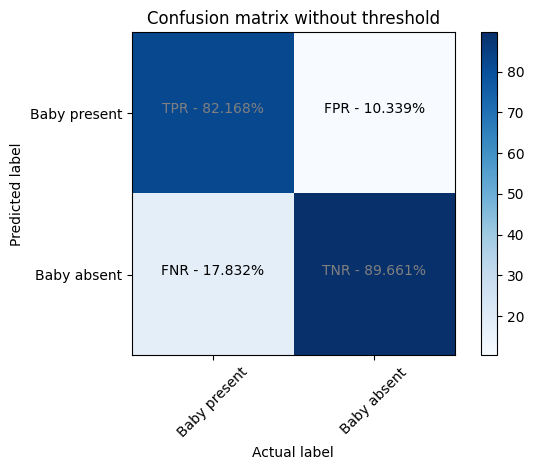

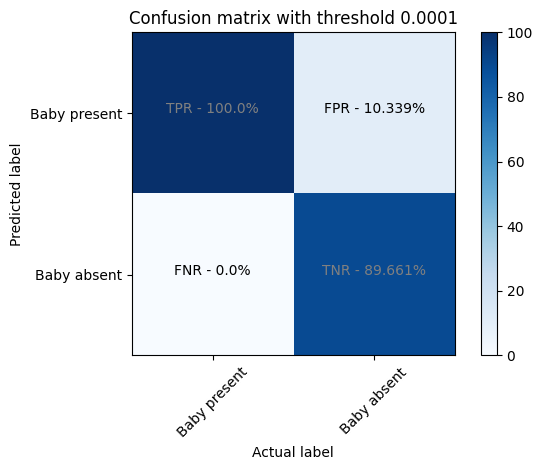

Model saved successfully.


In [2]:
#Packages needed for the model
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import itertools
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix

print("----------------------------------------------------------")
print("----------------------------------------------------------")
print("Load train data......")
# Load the training data
train_data = np.load('/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/Final/data/numpy_data/train.npy') 
train_label = np.load('/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/Final/data/numpy_data/train_label.npy')

print("")
print("Load test data......")
# Load the test data based on the test type
#test_1 is for testing with baby present and absent
#test_data = np.load('/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/Final/data/numpy_data/test_1.npy')
#test_label = np.load('/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/Final/data/numpy_data/test_label_1.npy')

#test_2 is for testing with baby present(sunscreen and scarf) and absent while the model is trained without sunscreen and scarf
#test_data = np.load('/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/Final/data/numpy_data/test_2.npy')
#test_label = np.load('/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/Final/data/numpy_data/test_label_2.npy')

#test_all is for testing with baby present, sunscreen, scarf and absent while the model is trained without sunscreen and scarf
test_data = np.load('/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/Final/data/numpy_data/test_all.npy')
test_label = np.load('/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/Final/data/numpy_data/test_label_all.npy')

print("----------------------------------------------------------")
# Define the model
print("Load CNN model......")
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
print("Compilong the model......")
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print("")

# Train the model
#print("Training the model with same data 10 times......")
#model.fit(train_data, train_label, epochs=10, batch_size=32)


# Load the saved model
print("Loading saved model......")
loaded_model = tf.keras.models.load_model('/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/Final/data/saved_models/CNN_model.h5')
print("Model loaded successfully......")


# Evaluate the model on the test data
print("Test the model......")
y_pred_prob = model.predict(test_data)
y_pred_classes = np.round(y_pred_prob)
print("----------------------------------------------------------")
print("----------------------------------------------------------")
# Create a confusion matrix
tn1, fn1, fp1, tp1 = confusion_matrix(y_pred_classes, test_label).ravel()
accuracy = (tn1+tp1)/(tp1+tn1+fp1+fn1)
precision = tp1/(tp1+fp1)
Recall = tp1/(tp1+fn1)
F_Score = (2*precision*Recall) / (precision + Recall)
cp= np.array([[tp1, fp1], [fn1, tn1]])
print('Confusion matrix:\n', cp)
print("")
print('Accuracy in %:', accuracy*100, '%')
print("precision: ", precision)
print("Recall: ", Recall)
print("F_Score: ", F_Score)
print("")
tpr1 = tp1 / (tp1 + fn1)    #True positive rate
tnr1 = tn1 / (tn1 + fp1)    #True negative rate
fpr1 = fp1 / (tn1 + fp1)    #False positive rate
fnr1 = fn1 / (fn1 + tp1)    #False negative rate
cm= np.array([[tpr1*100, fpr1*100], [fnr1*100, tnr1*100]])
print('Confusion matrix without threshold:')
print('TNR:', tnr1, 'FPR:', fpr1)
print('TPR:', tpr1, 'FNR:', fnr1)
print("----------------------------------------------------------")

# Adjust the threshold to achieve higher TPR, TNR, and lower FNR, FPR
tprs = []
tnrs = []
fnrs = []
fprs = []
thresholds = np.arange(0.0001, 1.01, 0.01)
for t in thresholds:
    y_pred = (y_pred_prob >= t).astype(int).flatten()
    tn, fn, fp, tp = confusion_matrix(y_pred, test_label).ravel()
    tpr = tp / (tp + fn)
    fnr = fn / (fn + tp)
    tprs.append(tpr)
    fnrs.append(fnr)
best_idx = np.argmax(np.array(tprs) - np.array(fnrs) )
best_threshold = thresholds[best_idx]
print("----------------------------------------------------------")
# Evaluate the model with the best threshold
y_pred = (y_pred_prob >= best_threshold).astype(int).flatten()
#create the confusion matrix
tn2, fn2, fp2, tp2 = confusion_matrix(y_pred, test_label).ravel()
accuracy = (tn1+tp2)/(tp2+tn1+fp1+fn2)
precision1 = tp2/(tp2+fp1)
Recall1= tp2/(tp2+fn2)
F_Score1 = (2*precision1*Recall1) / (precision1 + Recall1)
cc= np.array([[tp2, fp2], [fn2, tn2]])
print(cc)
print("")
print('Accuracy in %:', accuracy*100, '%')
print("precision: ", precision1)
print("Recall: ", Recall1)
print("F_Score: ", F_Score1)
print("")
tpr2 = tp2 / (tp2 + fn2)
fnr2 = fn2 / (fn2 + tp2)
cc= np.array([[tpr2*100, fpr1*100], [fnr2*100, tnr1*100]])
print('Confusion matrix with threshold:', best_threshold)
print('TNR:', tnr1, 'FPR:', fpr1)
print('TPR:', tpr2, 'FNR:', fnr2)
print("----------------------------------------------------------")
print("----------------------------------------------------------")


# Plot the confusion matrix
class_names = ['Baby present', 'Baby absent']
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix without threshold')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
fmt = 'f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if i==0 and j==0:
        labels= 'TPR - '
    elif i==0 and j==1:
        labels= 'FPR - '
    elif i==1 and j==0:
        labels= 'FNR - '
    elif i==1 and j==1:
        labels= 'TNR - '
    texts = round((cm[i,j]), 3)
    plt.text(j, i, labels + str(texts) + '%',
             horizontalalignment="center",
             color="gray" if cm[i, j] > thresh else "black")
plt.ylabel('Predicted label')
plt.xlabel('Actual label')
plt.tight_layout()
plt.show()

plt2.imshow(cc, interpolation='nearest', cmap=plt2.cm.Blues)
plt2.title('Confusion matrix with threshold ' + str(best_threshold))
plt2.colorbar()
tick_marks = np.arange(len(class_names))
plt2.xticks(tick_marks, class_names, rotation=45)
plt2.yticks(tick_marks, class_names)
fmt = 'f'
thresh = cc.max() / 2.
for i, j in itertools.product(range(cc.shape[0]), range(cc.shape[1])):
    if i==0 and j==0:
        labels= 'TPR - '
    elif i==0 and j==1:
        labels= 'FPR - '
    elif i==1 and j==0:
        labels= 'FNR - '
    elif i==1 and j==1:
        labels= 'TNR - '
    texts = round((cc[i,j]), 3)
    plt2.text(j, i, labels + str(texts) + '%',
             horizontalalignment="center",
             color="gray" if cc[i, j] > thresh else "black")
plt2.ylabel('Predicted label')
plt2.xlabel('Actual label')
plt2.tight_layout()
plt2.show()

# Save the trained model
model.save('/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/Final/data/saved_models/CNN_model.h5')
print("Model saved successfully.")